In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

def load_dataset():
    dataset = pd.read_csv("SeoulBikeData.csv")

    dates = pd.to_datetime(dataset["Date"])
    hours = pd.to_timedelta(dataset["Hour"], unit="h")
    datetime = dates + hours
    datediff = (datetime - datetime.min()).astype('timedelta64[h]')
    dataset["Date"] = datediff

    dataset["Seasons"] = pd.factorize(dataset["Seasons"])[0]

    dataset["Holiday"] = pd.factorize(dataset["Holiday"])[0]
    
    dataset = dataset[dataset["Functioning Day"] == "Yes"]
    dataset.drop("Functioning Day", axis=1, inplace=True)

    return dataset


def normalize_dataset(df):
    return (df - df.mean()) / (df.max() - df.min())



Cleaned dataset:

In [2]:
dataset = load_dataset()
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,0.0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0
1,1.0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0
2,2.0,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0
3,3.0,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0
4,4.0,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0


Shuffle dataset:

In [3]:
#dataset = dataset.sample(frac=1).reset_index(drop=True) 
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,0.0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0
1,1.0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0
2,2.0,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0
3,3.0,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0
4,4.0,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0


Normalized dataset:

In [4]:
dataset = normalize_dataset(dataset)
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,-0.720303,-0.133696,-0.500306,-0.314179,-0.215788,0.064070,0.286937,-0.372751,-0.161326,-0.004261,-0.008828,-0.487773,-0.048198
1,-0.720243,-0.147765,-0.456827,-0.319424,-0.205584,-0.125119,0.286937,-0.372751,-0.161326,-0.004261,-0.008828,-0.487773,-0.048198
2,-0.720184,-0.156488,-0.413349,-0.328165,-0.195380,-0.098092,0.286937,-0.374481,-0.161326,-0.004261,-0.008828,-0.487773,-0.048198
3,-0.720124,-0.175058,-0.369871,-0.331662,-0.185175,-0.111606,0.286937,-0.372751,-0.161326,-0.004261,-0.008828,-0.487773,-0.048198
4,-0.720065,-0.183218,-0.326393,-0.328165,-0.225992,0.077583,0.286937,-0.390052,-0.161326,-0.004261,-0.008828,-0.487773,-0.048198


In [5]:
labels = dataset["Rented Bike Count"]
dataset.drop("Rented Bike Count", axis=1, inplace=True)

TRAINING_SET_SIZE = 7000
training_dataset = dataset.iloc[:TRAINING_SET_SIZE] # first 7000 row train dataset
testing_dataset = dataset.iloc[TRAINING_SET_SIZE:, :] # > 7000 row test dataset
training_labels = labels.iloc[:TRAINING_SET_SIZE] # first 7000 train label
testing_labels = labels.iloc[TRAINING_SET_SIZE:] # > 7000 row test label

# Linear regression
polynomial_features = PolynomialFeatures(degree=1, include_bias=False) # degree?
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                    ("linear_regression", linear_regression)])
pipeline.fit(training_dataset, training_labels)
scores = cross_val_score(pipeline, testing_dataset, testing_labels, scoring="neg_mean_squared_error")
print(-scores.mean()) # 0.015071864542409594 with no shuffle

0.015071864542409594


Coefficients:

In [6]:
coefficients = pd.concat([pd.DataFrame(training_dataset.columns),pd.DataFrame(np.transpose(linear_regression.coef_))], axis = 1)
coefficients.head(len(training_dataset.columns))

,0,0
0,Date,-0.006318
1,Hour,0.182075
2,Temperature(C),0.353938
3,Humidity(%),-0.257615
4,Wind speed (m/s),0.052618
5,Visibility (10m),-0.006689
6,Dew point temperature(C),0.072406
7,Solar Radiation (MJ/m2),-0.078414
8,Rainfall(mm),-0.589271
9,Snowfall (cm),0.091631


Ridge regularization

Lasso regularization

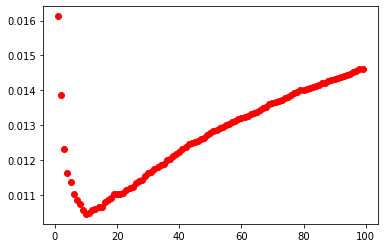

In [7]:
# K NN regression
all_scores = []
every_i = range(1, 100, 1)
for i in every_i:
    k_neighbor_regression = KNeighborsRegressor(n_neighbors=i, weights='uniform', n_jobs=-1)
    k_neighbor_regression.fit(training_dataset, training_labels)

    scores = cross_val_score(k_neighbor_regression, testing_dataset, testing_labels,
                             scoring="neg_mean_squared_error")
    all_scores.append(-scores.mean())

plt.plot(every_i, all_scores, 'or')
plt.show()